In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Generate training data
np.random.seed(0)  # For reproducibility
x_train = np.random.uniform(0, 1, 1000)  # 1000 points in [0, 1]
y_train = np.where(x_train < 0.5, 0, 1)  # Heaviside step function H(x)

In [3]:
# Single-layer neural network
model_single_layer = Sequential()
model_single_layer.add(Dense(units=1, input_dim=1, activation='sigmoid'))  # Single hidden layer with 1 neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the single-layer model
model_single_layer.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

# Train the single-layer model
model_single_layer.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

In [5]:
# Multi-layer (deep) neural network
model_multi_layer = Sequential()
model_multi_layer.add(Dense(units=10, input_dim=1, activation='relu'))  # First hidden layer with 10 neurons
model_multi_layer.add(Dense(units=10, activation='relu'))               # Second hidden layer with 10 neurons
model_multi_layer.add(Dense(units=1, activation='sigmoid'))             # Output layer

In [6]:
# Compile the multi-layer model
model_multi_layer.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')

# Train the multi-layer model
model_multi_layer.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

In [7]:
# Generate test data
x_test = np.linspace(0, 1, 100)  # 100 points in [0, 1] for testing
y_test = np.where(x_test < 0.5, 0, 1)  # True step function values

# Predict using the trained models
y_pred_single_layer = model_single_layer.predict(x_test)
y_pred_multi_layer = model_multi_layer.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


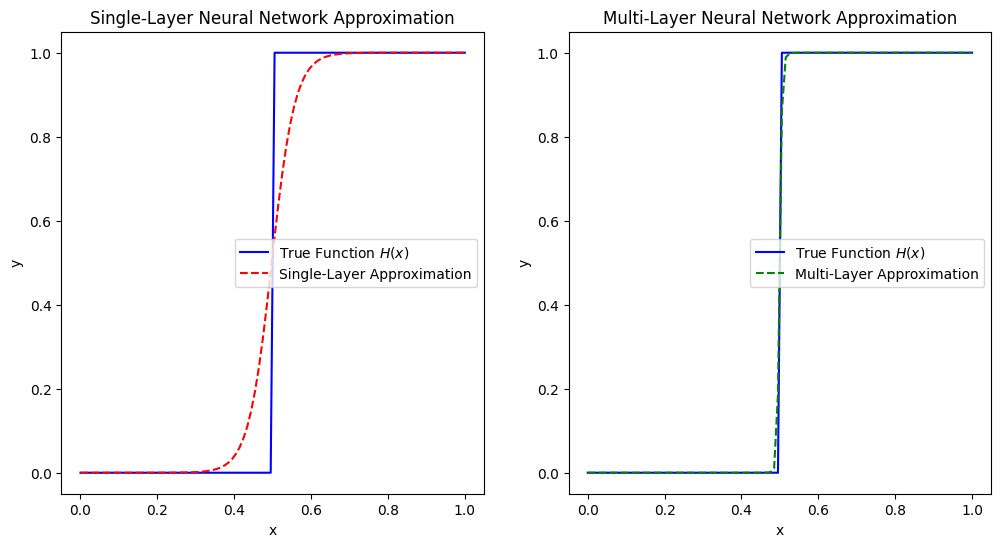

In [8]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot for the single-layer network
plt.subplot(1, 2, 1)
plt.plot(x_test, y_test, color='blue', label='True Function $H(x)$')
plt.plot(x_test, y_pred_single_layer, color='red', linestyle='--', label='Single-Layer Approximation')
plt.title('Single-Layer Neural Network Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot for the multi-layer network
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, color='blue', label='True Function $H(x)$')
plt.plot(x_test, y_pred_multi_layer, color='green', linestyle='--', label='Multi-Layer Approximation')
plt.title('Multi-Layer Neural Network Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()